<a href="https://colab.research.google.com/github/willsketch/MultiVariateStatiscalAnalysis/blob/main/i0p16a_dimensionality_reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Unsupervised Learning: Dimensionality Reduction**

As part of unsupervised learning, we will focus on Dimensionality Reduction and Clustering. This is the **Dimensionality Reduction** part.

**Dimensionality reduction helps simplify high-dimensional data while preserving important structures and patterns, making it easier to visualize and analyze.**

# **1. Practical matters**

For this exercise, we will use colab to run this python notebook.

**IMPORTANT: First make your own copy of this notebook, using File -> Save a copy in Drive/Github**


We will cover several popular methods for dimensionality reduction, including:

1.   Singular Value Decomposition (SVD)
2.   Principal Component Analysis (PCA)
3.   t-Distributed Stochastic Neighbor Embedding (t-SNE)
4.   Uniform Manifold Approximation and Projection (UMAP)

Each technique offers unique strengths and is suited to different types of data and analysis objectives.


---
<br>


We will mainly use the **Scikit-learn** Python library (https://scikit-learn.org/stable/), which provides all tools we need to do descriptive and predictive analysis on complex data.

Scikit-learn not only offers **machine learning algorithms** but also comes with a **variety of built-in datasets that are perfect for learning and experimentation.**

Scikit-learn contains a **`datasets`** module that provides several ways to load and generate data, we will use both of them:

1.   **Built-in Datasets**: Ready-to-use real-world datasets.
2.   **Data Generators**: Functions to create synthetic datasets for specific patterns.

These datasets typically return a special object, we will explain when we load it.


---
<br>



<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/05/Scikit_learn_logo_small.svg/1200px-Scikit_learn_logo_small.svg.png" width=400px />

**Before each exercise, make sure to check out the related documentation on the scikit-learn website!**



## **1.1 Setting things up**

See https://scikit-learn.org/stable/install.html for instructions on how to install the scikit-learn library. We will also introduce two powerful visualization libraries: **Seaborn** and **Vega-Altair**.


**Seaborn** is **built on top of Matplotlib** and provides a **high-level interface for creating attractive statistical graphics**. It comes with built-in themes and color palettes that make your visualizations look professional with minimal effort. Seaborn is particularly well-suited for working with pandas DataFrames and showing the relationship between variables.


**Vega-Altair** (or simply Altair) is a declarative statistical visualization library that offers a powerful and **flexible way to create interactive plots**. It follows the grammar of graphics principles and allows you to create complex visualizations with concise, intuitive code.


---

<br>
<br>
<br>
Before we begin, let's ensure we have all the required libraries installed. We'll need several libraries for data manipulation, visualization, and dimensionality reduction:

In [3]:
try:
    # Data manipulation libraries
    import pandas as pd
    import numpy as np

    # Visualization libraries
    import matplotlib.pyplot as plt
    import seaborn as sns
    import altair as alt

    # Machine learning
    from sklearn import datasets
    from sklearn.preprocessing import LabelEncoder
    from sklearn.preprocessing import StandardScaler
    from sklearn.decomposition import TruncatedSVD
    from sklearn.decomposition import PCA
    from sklearn.manifold import TSNE
    import umap

    print("All required libraries are already installed!")
except ImportError as e:
    print(f"Missing library: {e}")

All required libraries are already installed!


This is an example of using the pip command to install these libraries. If the cell above returns a "Missing library" error, run the cell below (`!pip install ...`) and then retry.

In [2]:
!pip install numpy pandas seaborn matplotlib altair scikit-learn umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.1 MB/s eta 0:00:00


**Make sure you re-import all packages**

## **1.2 Datasets**

We will use three datasets:
1. Fisher iris dataset
2. Swiss Roll
3. MNIST (Modified National Institute of Standards and Technology database)

### **1.2.1 Fisher Iris dataset**

The iris dataset (https://www.kaggle.com/datasets/uciml/iris) used in a paper by Sir Ronald Fisher in 1936 describes 150 iris flowers, equally distributed across 3 species: Iris setosa, Iris versicolor and Iris virginica. For each flower, the following features are recorded:

1. sepal length
2. sepal width
3. petal length
4. petal width
5. species

<img src="https://miro.medium.com/v2/resize:fit:1400/format:webp/1*f6KbPXwksAliMIsibFyGJw.png" width=500px >


In [4]:
df_iris = pd.read_csv('http://vda-lab.github.io/assets/iris.csv')

In [5]:
# Print the first 5 records and show the data type for each column
print(df_iris.head(5))
print("\nData types of each column:")
for col in df_iris.columns:
    print(f'{col}: {df_iris[col].dtype}')

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

Data types of each column:
sepal_length: float64
sepal_width: float64
petal_length: float64
petal_width: float64
species: object


Let's make a scatterplot matrix of the numerical features, coloured by species. This will give us a first idea of the data so that we know what we're working with.

We can do this using a Seaborn `pairplot`. Seaborn is a plotting library in python. See here for more information about the pairplot: https://seaborn.pydata.org/tutorial/introduction.html

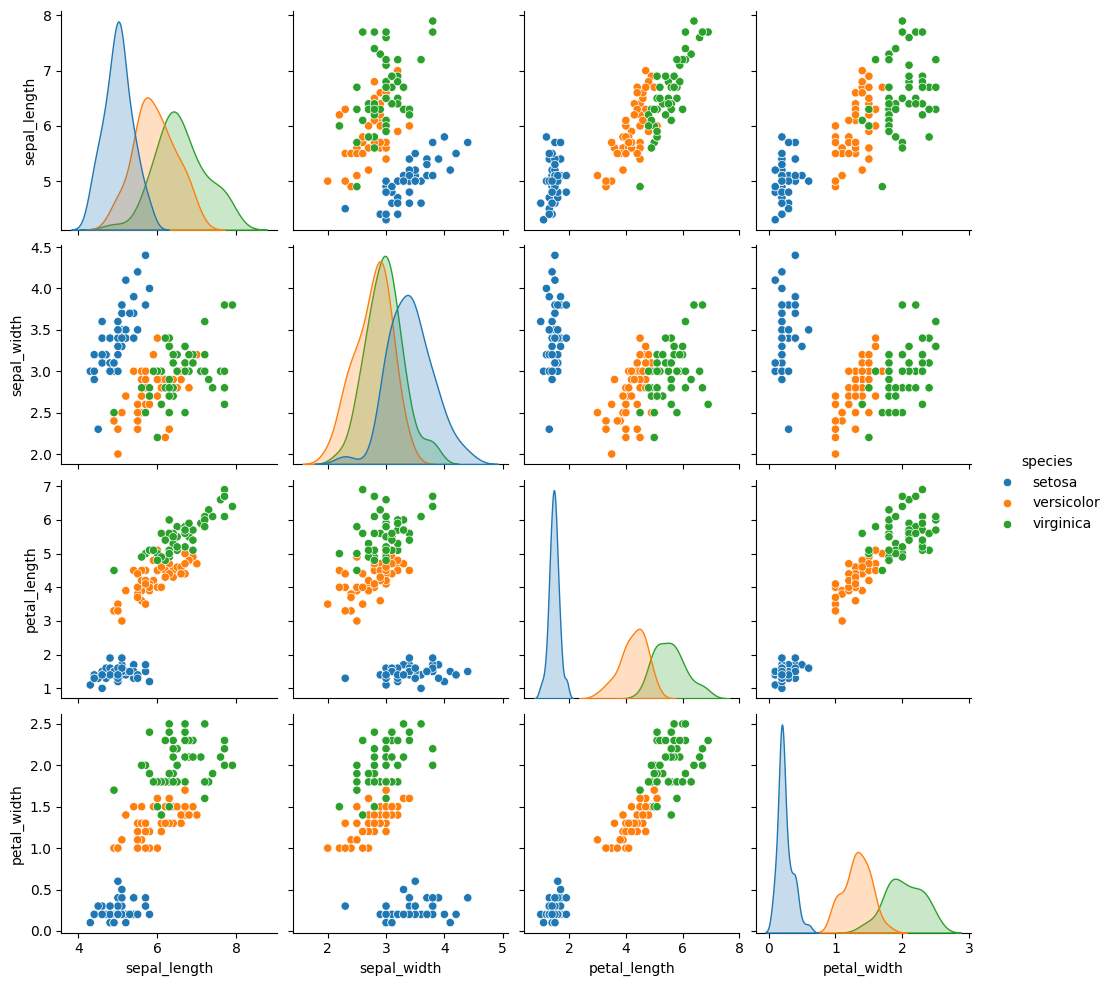

In [6]:
sns.pairplot(df_iris, hue="species")

Since there is one column which is not numeric, we need to create a new data frame with only the numeric features.

In [7]:
df_iris_numeric = df_iris.select_dtypes(include=[float, int])

**Think about these questions and put your answer on google forms:**

https://forms.gle/BFJ2apm6WBZjEb6h6

(keep this form open, you will need this later)

•	**E1**: Describe the scatterplot matrix. What patterns do you observe among the different species?

•	**E2**: Based on the scatterplots, which features seem to separate the species well?

### **1.2.2 Swiss Roll**

The Swiss Rolls dataset is a simple 1600 x 3 dimension dataset. It consists of 1600 observations of 3 variables which represent 3 dimensional coordinates. The purpose of the data set was to use it for testing dimensionality reduction techniques. It gets its name due to the fact that the 3 dimensional version (which is generated by taking the coordinates in a 2 dimensional plot created from a Gaussian distribution and mapping it to a 3 dimensional table with (x,y) -> (x cos x, y, x sin x)) looks similar to the dessert snack, generically called "Swiss Rolls".




In [8]:
# Let's generate our swiss roll dataset
sr_points, sr_color = datasets.make_swiss_roll(n_samples=1600, random_state=0)

Now we have two arrays: one is the coordinates of the Swiss roll in three-dimensional space, and the other is the color of each data point.

Keep in mind the type of input data the library requires, as it could be either a DataFrame or an array. Be careful to use the correct format.

In [9]:
print ("The first 5 Swiss roll datapoints:")
print (sr_points[:5])
print ("\nThe colour of those 5 datapoints:")
print (sr_color[:5])

The first 5 Swiss roll datapoints:
[[ -8.85708287  19.30259102  -4.38885338]
 [  5.0569229    8.64415565 -10.2760021 ]
 [ -5.88799247   6.41060721  -8.56459157]
 [ -8.97976616  19.80430747  -4.04262377]
 [ -6.54730982  20.80368554   5.7370691 ]]

The colour of those 5 datapoints:
[ 9.8848344  11.45288996 10.39329996  9.84779199  8.7052414 ]


Let plot this Siwss roll

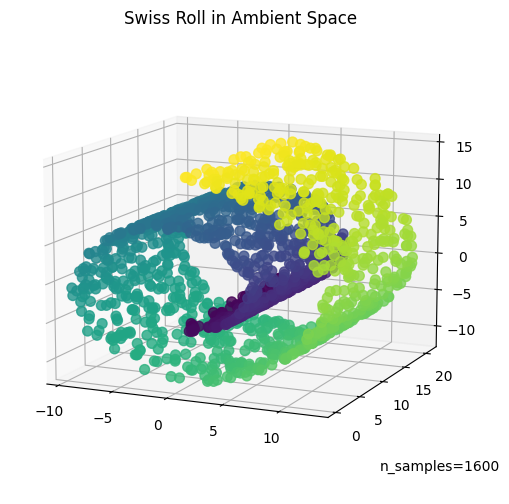

In [10]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d")
fig.add_axes(ax)
ax.scatter(
    sr_points[:, 0], sr_points[:, 1], sr_points[:, 2], c=sr_color, s=50, alpha=0.8
)
ax.set_title("Swiss Roll in Ambient Space")
ax.view_init(azim=-66, elev=12)
_ = ax.text2D(0.8, 0.05, s="n_samples=1600", transform=ax.transAxes)

Let's try to make a pairplot for this data as well.

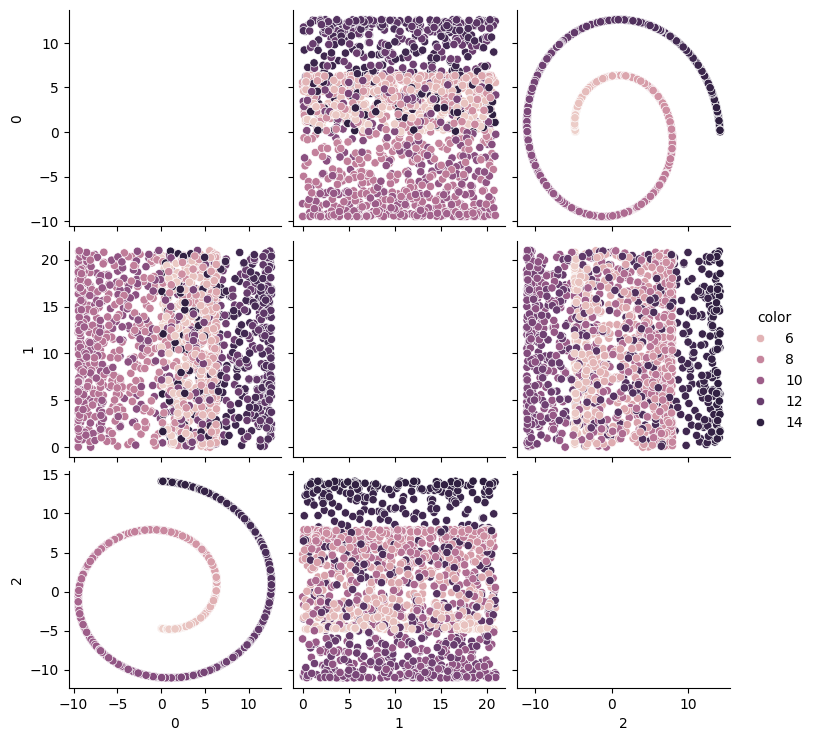

In [23]:
df_swiss_roll = pd.DataFrame(sr_points)
df_swiss_roll['color'] = sr_color

# YOUR CODE HERE TO PLOT
sns.pairplot(df_swiss_roll, hue='color')

**Think about this question and put your answer on google forms:**:

• **E3**: Does a pairplot for the Swiss roll data make sense? Why or why not?

•	**E4**: Is there any feature that could be used to interpret this dataset, like we did for the Iris dataset?

### **1.2.3 MNIST**

Beyond dataframes and arrays, there are some bigger and more complex data types used in practice to store images.

The **MNIST** (Modified National Institute of Standards and Technology) dataset is a widely used benchmark in the field of machine learning and computer vision. **It consists of 70,000 grayscale images of handwritten digits, ranging from 0 to 9.** Each image is 28x28 pixels, resulting in a total of 784 pixels per image. The dataset is divided into a training set of 60,000 images and a test set of 10,000 images. Due to its simplicity and the extensive amount of research conducted using this dataset, MNIST serves as a standard for evaluating image classification algorithms, allowing researchers and developers to test and compare their models’ performance on a common task.

**We will use a smaller version of mnist from `sklearn`**, which consists of 8*8 pixel images of digits, instead of 28x28 pixels to speed up. This dataset is available within `sklearn`. Let's start and see what this dataset contais:

In [17]:
digits = datasets.load_digits()

The object returned by `datasets.load_digits()` in scikit-learn is a Bunch object, which is similar to a Python dictionary but with some added functionality. The **Bunch object** stores various components of the dataset.



In [18]:
print('The type of object returns by `load_digits` is: ')
print(type(digits))
print('\nDigits dictionary content \n{}'.format(digits.keys()))
print('\n')
for key in digits.keys():
    print(f"{key}: {type(digits[key])}")

The type of object returns by `load_digits` is: 
<class 'sklearn.utils._bunch.Bunch'>

Digits dictionary content 
dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


data: <class 'numpy.ndarray'>
target: <class 'numpy.ndarray'>
frame: <class 'NoneType'>
feature_names: <class 'list'>
target_names: <class 'numpy.ndarray'>
images: <class 'numpy.ndarray'>
DESCR: <class 'str'>


Each dataset is well-documented and comes with metadata that helps understand its structure and purpose.


Let's visualize some examples from the digits dataset. We'll display the first **four handwritten digit images along with their corresponding labels**. Each image is shown in grayscale, where darker pixels indicate the pen strokes that form the digit.

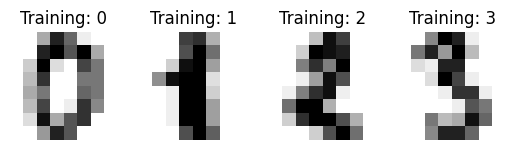

In [19]:
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

**Think about these questions and put your answer on google forms:**

• **E5**. Does it make sense to create a `pairplot` for the MNIST dataset? Think about the number of dimensions we have and what they represent exactly.

• **E6**. Given your answer for E5: is there any feature that can distinguish handwritten 0 and 1?


•	**E7**. What challenges do high-dimensional datasets like MNIST pose for machine learning algorithms?

# **2. `scikit-learn` approach**

In scikit-learn, `fit` and `fit_transform` are fundamental methods that you'll encounter frequently. Understanding these methods is crucial as they follow scikit-learn's consistent API design:


*   `fit(X[, y])`: This method is used to train or compute the parameters of your model/transformer using your training data. **Think of it as the "learning" step where the algorithm learns from your data.**
*   `transform(X)`: After fitting, this method applies the learned transformation to your data. **You can use it on both training data and new, unseen data**
*    `fit_transform(X[, y])`: This is a convenience method that combines both fit and transform in one step. **It's equivalent to calling fit() followed by transform(), but is often more efficient**.

# **3. Linear Dimensionality Reduction**

Dimensionality reduction techniques can be broadly categorized into linear and nonlinear methods. Linear methods assume that the data lies approximately on a lower-dimensional linear subspace of the original high-dimensional space. Two of the most commonly used linear approaches are Principal Component Analysis (PCA) and Singular Value Decomposition (SVD), they both rely heavily on linear algebra techniques for their mathematical formulations and computations.

### **3.1 Singular value decomposition (SVD)**

SVD is linear dimensionality reduction technique closely related to PCA but can be more computationally efficient for certain types of data.

SVD decomposes a matrix  A  (with dimensions  m \times n ) into three other matrices:

 A = $\mathbf{U}$ $\Sigma$ $\mathbf{V}^*$


*   $\mathbf{U}$ : An  $m \times m$  orthogonal matrix whose columns are called the left singular vectors of  A .
*   $\Sigma$ : An  $m \times n$  diagonal matrix that contains the singular values of  A . These singular values are non-negative and typically arranged in descending order.
*   $\mathbf{V}^*$
 : The transpose of an  $n \times n$  orthogonal matrix whose columns are called the right singular vectors of A.
The singular values in  $\Sigma$  give us a measure of the importance or “weight” of the corresponding singular vectors in  U  and  V .


---

Let's apply SVD for dimensionality reduction using **scikit-learn's TruncatedSVD** on the iris dataset:

In [24]:
from sklearn.decomposition import TruncatedSVD

In [25]:
svd = TruncatedSVD(n_components=2)
sklearn_svd = svd.fit_transform(df_iris_numeric)

This code performs two main operations:

* First, `fit()` computes the SVD decomposition:

* Finds the singular vectors (U and V^T matrices), calculates the singular values (Σ matrix), and only keeps the top 2 components (as specified by n_components=2)

* Then, `transform()` projects the original data onto these components:
 taking the original data (df_iris_numeric) with 4 features, projects these onto the 2 most important singular vectors, and returns a new array (sklearn_svd) with just 2 dimensions.

The `fit_transform()` method combines these steps efficiently into a single operation. The resulting sklearn_svd array will have the same number of samples as df_iris_numeric but only 2 features, making it suitable for visualization while preserving the most important patterns in the data.

In [26]:
# Now let's examine the components of SVD
VT = svd.components_        # Right singular vectors
Sigma = svd.singular_values_  # Singular values

# To get U, we need to do more work
# We know that fit_transform(X) return U*Sigma
U_Sigma = svd.transform(df_iris_numeric)
U = U_Sigma/svd.singular_values_ # not a dot division

# Print the matrices to understand the decomposition
print("U matrix (left singular vectors): first 5 rows")
print(U[:5])

print("\nSigma matrix (diagonal matrix of singular values):")
print(np.diag(Sigma))

print("\nV^T matrix (right singular vectors):")
print(VT)

U matrix (left singular vectors): first 5 rows
[[ 0.06161712 -0.12996943]
 [ 0.0580723  -0.11137145]
 [ 0.05676339 -0.11829477]
 [ 0.05665431 -0.10560773]
 [ 0.06123006 -0.13143114]]

Sigma matrix (diagonal matrix of singular values):
[[95.95066751  0.        ]
 [ 0.         17.72295328]]

V^T matrix (right singular vectors):
[[ 0.75116805  0.37978837  0.51315094  0.16787934]
 [-0.28583096 -0.54488976  0.70889874  0.34475845]]


In [27]:
# Let's see how much variance is explained by each component
explained_variance_ratio = svd.explained_variance_ratio_
print("\nExplained variance ratio:", explained_variance_ratio)
print(f"Total variance explained: {sum(explained_variance_ratio)*100:.2f}%")


Explained variance ratio: [0.53028106 0.44685765]
Total variance explained: 97.71%


Key points about SVD for dimensionality reduction:

*   The singular values in Σ tell us how important each
*   The explained variance ratio helps us understand how much information we retain
* The reduced data can be used for visualization or as input to other algorithms





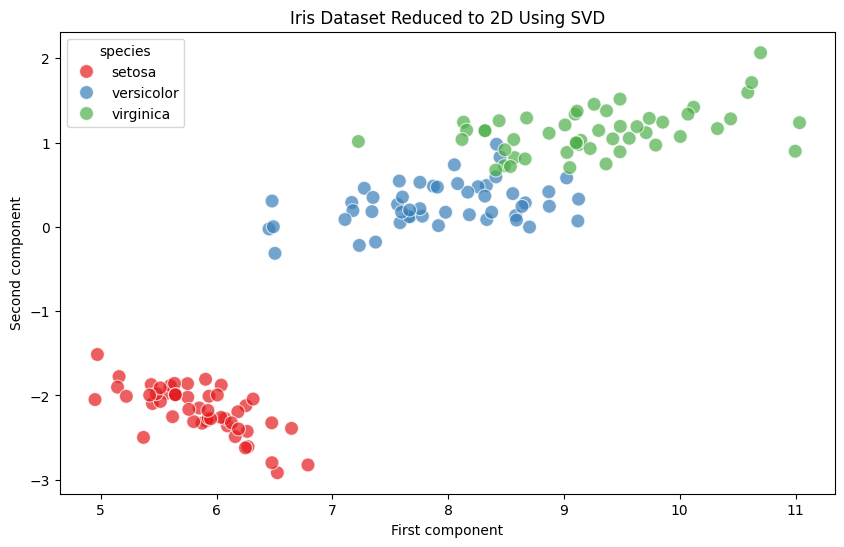

In [30]:
# Visualize the reduced data
plt.figure(figsize=(10, 6))

# add plot data
df_iris['svd1'] = sklearn_svd[:, 0]
df_iris['svd2'] = sklearn_svd[:, 1]

sns.scatterplot(data=df_iris, x='svd1', y='svd2', hue='species',
                palette='Set1', s=100, edgecolor='w', alpha=0.7)

plt.xlabel('First component')
plt.ylabel('Second component')
plt.title('Iris Dataset Reduced to 2D Using SVD')

plt.show()

In the code above, we wrote `df_iris['svd1'] = something`. What we basically do here, is add new features to the `df_iris` dataset. Have a look at the updated dataset after that addition:

In [29]:
df_iris

,sepal_length,sepal_width,petal_length,petal_width,species,svd1,svd2
0,5.1,3.5,1.4,0.2,setosa,5.912204,-2.303442
1,4.9,3.0,1.4,0.2,setosa,5.572076,-1.973831
2,4.7,3.2,1.3,0.2,setosa,5.446485,-2.096533
3,4.6,3.1,1.5,0.2,setosa,5.436019,-1.871681
4,5.0,3.6,1.4,0.2,setosa,5.875066,-2.329348
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,9.226698,0.929481
146,6.3,2.5,5.0,1.9,virginica,8.566555,1.036575
147,6.5,3.0,5.2,2.0,virginica,9.026101,0.883220
148,6.2,3.4,5.4,2.3,virginica,9.105660,0.996221


**Try this and put your answer on google forms:**


*   E8. Can you try to plot this scatterplot by setting the colour like this: `hue=df_iris.species`? What happens? And why?






---

**Alternatives**:

We can also use **`altair`** to plot. This is a python library that uses the **vega** API. See here for more information: https://altair-viz.github.io/

In [31]:
# Create an interactive scatter plot
chart = alt.Chart(df_iris).mark_circle(size=60).encode(
    x=alt.X('svd1', title='First Component'),
    y=alt.Y('svd2', title='Second Component'),
    color=alt.Color('species', title='Species Type'),
    tooltip=['species']  # Add tooltip for interactivity
).properties(
    width=500,
    height=400,
    title='Iris Dataset Reduced to 2D Using SVD'
).configure_title(
    fontSize=16,
    anchor='middle'
).interactive()

# Display the chart
chart

/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)


SVD can also be done using **`numpy`** instead of scikit-learn:

U matrix (left singular vectors):
[[-0.10837451 -0.04301984]
 [-0.09985038  0.05575477]
 [-0.11332336  0.02709262]
 [-0.11027231  0.04894608]
 [-0.11432008 -0.05740194]]

Sigma matrix (diagonal matrix of singular values):
[[20.89551896  0.        ]
 [ 0.         11.75513248]]

Explained variance ratio: [0.72770452 0.23030523]
Total variance explained: 95.80%

V^T matrix (right singular vectors):
[[ 0.52237162 -0.26335492  0.58125401  0.56561105]
 [-0.37231836 -0.92555649 -0.02109478 -0.06541577]]


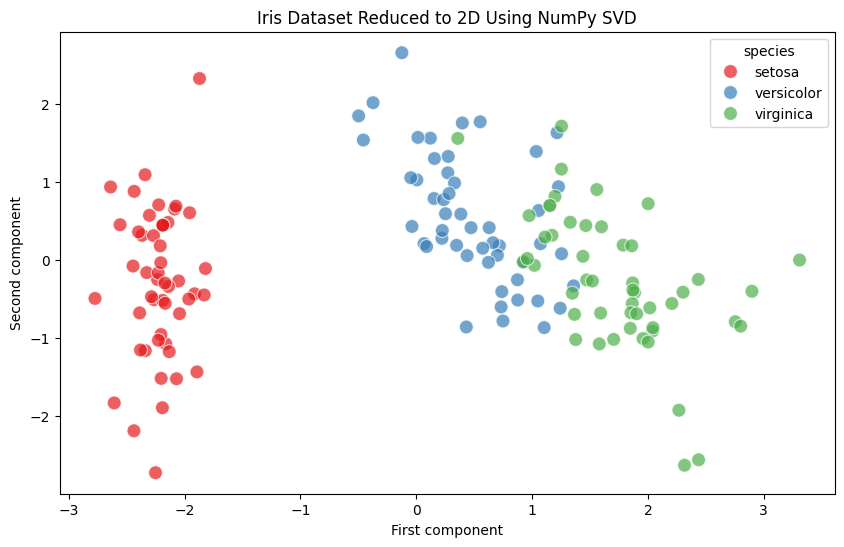

In [32]:
X_standardized = StandardScaler().fit_transform(df_iris_numeric)

# Perform SVD using numpy
U, Sigma, VT = np.linalg.svd(X_standardized, full_matrices=False)

# Keep only 2 components (equivalent to n_components=2 in TruncatedSVD)
n_components = 2
U_numpy = U[:, :n_components]
Sigma_numpy = Sigma[:n_components]
VT_numpy = VT[:n_components, :]

# Transform the data (equivalent to fit_transform in sklearn)
numpy_svd = U_numpy * Sigma_numpy

# Print the matrices to understand the decomposition
print("U matrix (left singular vectors):")
print(U_numpy[:5])

print("\nSigma matrix (diagonal matrix of singular values):")
print(np.diag(Sigma_numpy))

# Calculate explained variance ratio (equivalent to explained_variance_ratio_ in sklearn)
explained_variance = (Sigma ** 2) / (len(X_standardized) - 1)
total_variance = explained_variance.sum()
explained_variance_ratio = explained_variance / total_variance

print("\nExplained variance ratio:", explained_variance_ratio[:n_components])
print(f"Total variance explained: {sum(explained_variance_ratio[:n_components])*100:.2f}%")

print("\nV^T matrix (right singular vectors):")
print(VT_numpy)

# Visualize the reduced data
plt.figure(figsize=(10, 6))

df_iris['svd1_numpy'] = numpy_svd[:, 0]
df_iris['svd2_numpy'] = numpy_svd[:, 1]

sns.scatterplot(data=df_iris, x='svd1_numpy', y='svd2_numpy', hue='species',
                palette='Set1', s=100, edgecolor='w', alpha=0.7)

plt.xlabel('First component')
plt.ylabel('Second component')
plt.title('Iris Dataset Reduced to 2D Using NumPy SVD')

plt.show()

### **3.2 Principal component analysis (PCA)**

PCA involves finding the principal components of the data, which are essentially the eigenvectors of the covariance matrix. The computation of eigenvalues and eigenvectors, a core part of PCA, is a fundamental concept in linear algebra.

PCA transforms the data into a new coordinate system by projecting it onto the directions (principal components) that maximize variance. This transformation is done using matrix operations, another key element of linear algebra.


---


Let's initialize a PCA object that will reduce the dimensionality of your data to 2 components.

In [33]:
from sklearn.decomposition import PCA

In [34]:
pca = PCA(n_components=2)

In [35]:
pca_transformed = pca.fit_transform(df_iris_numeric)

This function first “fits” the PCA model to your data (df_iris_numeric), meaning it computes the principal components.

After fitting, it “transforms” the data, projecting it from its original higher-dimensional space into a new 2-dimensional space

Let's plot the 2D PCA projection of the 4D iris data:

In [36]:
# you can get the X and Y to plot pca projection
df_iris['pca1'] = pca_transformed[:, 0]
df_iris['pca2'] = pca_transformed[:, 1]

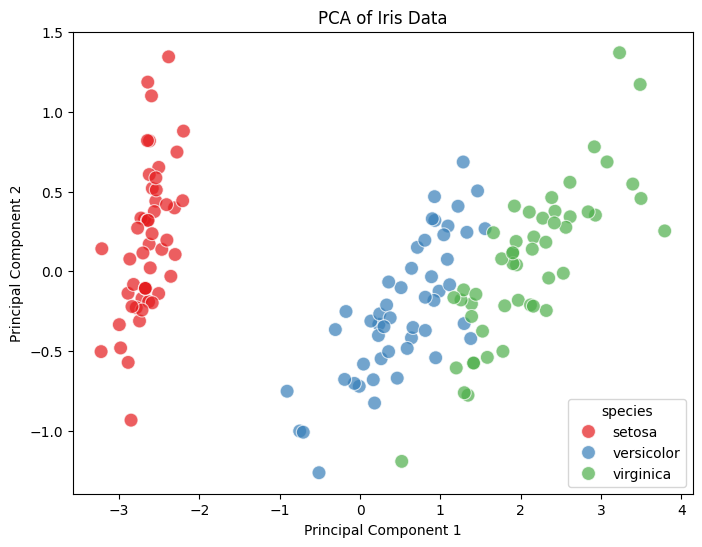

In [37]:
# Plot using Seaborn
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_iris, x='pca1', y='pca2', hue='species',
                palette='Set1', s=100, edgecolor='w', alpha=0.7)

# Add labels and title
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Iris Data')

# Show the plot
plt.show()

In [38]:
# Plot using altair
pca_chart = alt.Chart(df_iris).mark_circle(
    size=100,
    opacity=0.7
).encode(
    x=alt.X('pca1', title='Principal Component 1'),
    y=alt.Y('pca2', title='Principal Component 2'),
    color=alt.Color('species',
                   title='Species',
                   scale=alt.Scale(scheme='set1')),
    tooltip=['species']
).properties(
    width=600,
    height=400,
    title='PCA of Iris Data'
)

pca_chart

/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

**In practice, you can color your datapoint by any feature, it will help you to explore data.**

Eigenvalues (variance explained by each PC): [4.22484077 0.24224357 0.07852391 0.02368303]
Explained variance ratio: [0.92461621 0.05301557 0.01718514 0.00518309]


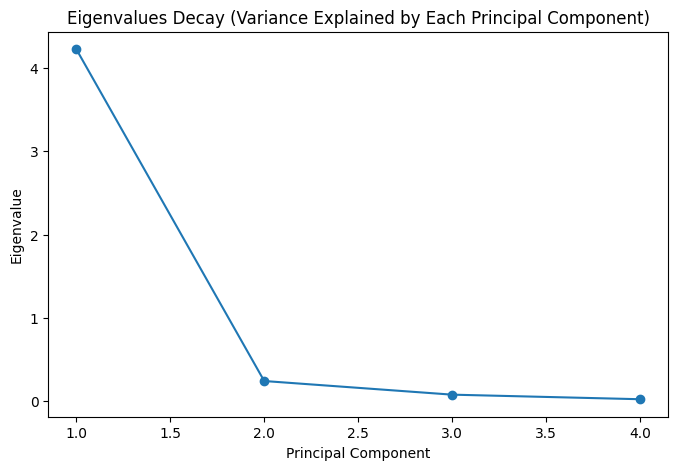

In [39]:
# Review how PCA works and then interpret the principal components in the plot

pca_test = PCA(n_components=4)
pca_test_transformed = pca_test.fit_transform(df_iris_numeric)

eigenvalues = pca_test.explained_variance_
explained_variance_ratio = pca_test.explained_variance_ratio_

# proportion of variance explained by each principal component
variance_explained = pca_test.explained_variance_ratio_

# print the eigenvalues
print("Eigenvalues (variance explained by each PC):", eigenvalues)

# Print the explained variance ratio
print("Explained variance ratio:", variance_explained)

# Plot the explained variance to visualize eigenvalues decay
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o', linestyle='-')
plt.title('Eigenvalues Decay (Variance Explained by Each Principal Component)')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.show()

**Think about these questions and put your answer on google forms:**

* **E9**. What do the principal components represent in this plot?

* **E10**. How do you interpret the PCA projection plot?

* **E11**. How do you interpret the decay of the eigenvalues in the plot?

* **E12**. What does this tell you about the intrinsic dimensionality of the Iris dataset?

* **E13**. Can you apply PCA to reduce its dimensionality to 3 components? or even more? Then how do you plot it?

* **E14**. How much variance is explained by the first two principal components?

There is important concept in PCA, which is `Loadings`, which are the coefficients (weights) of the original variables in the principal components. They indicate how much each original variable contributes to each principal component.

In [40]:
# Check first component's loading, and what kind of information you get?
loadings = pca.components_
# Convert loadings to a DataFrame for better readability
loadings_df = pd.DataFrame(loadings.T, columns=[f'PC{i+1}' for i in range(loadings.shape[0])], index=df_iris_numeric.columns)

# Print the original `pca.components_`
print("PCA components (i.e. loadings):")
print(pca.components_)

# Print the loadings for the first principal component (PC1)
print("Loadings for PC1:\n")
print(loadings_df['PC1'])

PCA components (i.e. loadings):
[[ 0.36158968 -0.08226889  0.85657211  0.35884393]
 [ 0.65653988  0.72971237 -0.1757674  -0.07470647]]
Loadings for PC1:

sepal_length    0.361590
sepal_width    -0.082269
petal_length    0.856572
petal_width     0.358844
Name: PC1, dtype: float64


A biplot is a type of plot that simultaneously displays the scores of the observations (data points) and the loadings of the variables (features) in a principal component analysis (PCA). This can help you visualize the principal components along with the contribution of each original feature to these components.

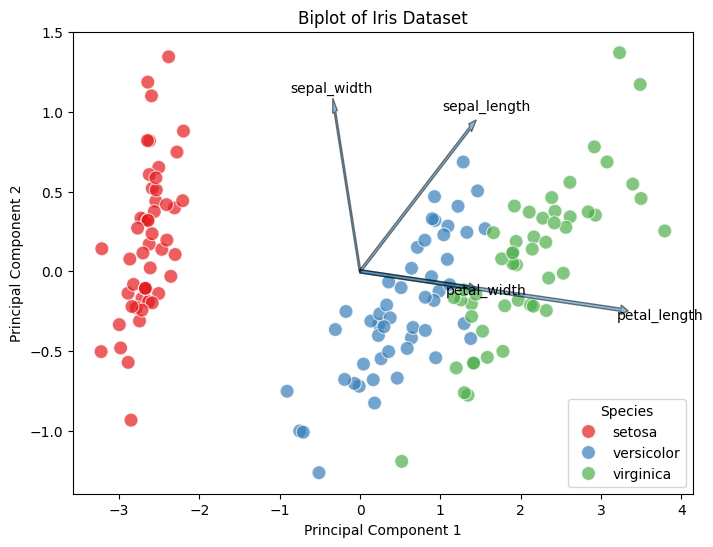

In [41]:
# Create a biplot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_iris, x='pca1', y='pca2', hue='species', palette='Set1', s=100, edgecolor='w', alpha=0.7)

# Plot the loadings (arrows for the original features)
for i, feature in enumerate(df_iris_numeric):
    plt.arrow(0, 0,
              pca.components_[0, i] * max(df_iris['pca1']),
              pca.components_[1, i] * max(df_iris['pca2']),
              alpha=0.5, width=0.02)
    plt.text(pca.components_[0, i] * max(df_iris['pca1']) * 1.15,
             pca.components_[1, i] * max(df_iris['pca2']) * 1.15,
             feature, ha='center', va='center')

# Label the plot
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Biplot of Iris Dataset')

# Add grid and legend
plt.legend(title='Species')
plt.show()

**Extra exercise when you finish the rest of the exercise:**

Let's create a PCA object that reduces data into 3 components.

Important note:
While reducing the iris dataset (which has 4 features) to 3 components might seem unnecessary, this example helps illustrate a key point: Dimensionality Reduction (DR) techniques are versatile tools that can be used for various purposes, **not just for visualizing high-dimensional data in 2D**!

In [ ]:
# YOUR CODE

# **4. Non-Linear Dimensionality Reduction**

### **4.1 Does linear algebra always work in any datasets?**

Can you try to apply PCA on swiss row dataset, and do above analysis by yourself.

In [ ]:
# YOUR CODE

Can you try to apply PCA on MNIST dataset by yourself?

In [ ]:
# YOUR CODE

**Think about these questions and put your answer on google forms:**


* **E15**.   Are PCA’s projections on these two datasets meaningful? Is there any useful pattern?
* **E16**.     Does t-SNE Component 1, Component 2 represent the similar meaning as PCA's components?










---


In the PCA projection, points that are actually close together on the manifold (e.g., along the same part of the roll) may be far apart in the PCA plot, and vice versa. PCA assumes that the data lies approximately on a lower-dimensional linear subspace of the original space. The Swiss roll dataset, however, is inherently non-linear. The data points lie on a two-dimensional manifold that has been “rolled” into a spiral in three-dimensional space. This structure cannot be adequately captured by a linear projection.

PCA will try to find the two principal components that maximize the variance in the data. However, due to the rolled structure, PCA will end up choosing directions that do not meaningfully unroll the dataset into two dimensions. Instead, it will flatten the Swiss roll onto a plane, losing the manifold structure and making points that are distant in the original space appear closer in the PCA-transformed space.

### **4.2 What is a manifold**



> In mathematics, a manifold is a topological space that locally resembles Euclidean space near each point. More precisely, an {n}-dimensional manifold, or {n}-manifold for short, is a topological space with the property that each point has a neighborhood that is homeomorphic to an open subset of {n}-dimensional Euclidean space. One-dimensional manifolds include lines and circles, but not self-crossing curves such as a figure 8. Two-dimensional manifolds are also called surfaces. Examples include the plane, the sphere, and the torus, and also the Klein bottle and real projective plane.

<div align="right">--  from [Wikipedia](https://en.wikipedia.org/wiki/Manifold)</div>


Take one example from the Swiss roll dataset, it is a synthetic three-dimensional dataset that consists of points lying on a two-dimensional manifold that is rolled up in a spiral shape in three-dimensional space. This means that, locally, around every small neighborhood of a point on the Swiss roll, the surface looks like a flat, two-dimensional plane.

In the PCA projection, **PCA cannot capture the non-linear manifold structure** of the Swiss roll because it only considers linear combinations of the features. It does not account for the fact that the data is rolled up in 3D space.

In [ ]:
# Plotting a line
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
x = np.linspace(-1, 1, 100)
y = x
plt.plot(x, y, label='Line')
plt.title('Line')
plt.axis('equal')

# Plotting a circle
plt.subplot(1, 3, 2)
theta = np.linspace(0, 2 * np.pi, 100)
x = np.cos(theta)
y = np.sin(theta)
plt.plot(x, y, label='Circle')
plt.title('Circle')
plt.axis('equal')

# Plotting a figure 8 (not a manifold)
plt.subplot(1, 3, 3)
t = np.linspace(0, 2 * np.pi, 100)
x = np.sin(t)
y = np.sin(t) * np.cos(t)
plt.plot(x, y, label='Figure 8')
plt.title('Figure 8 (Not a Manifold)')
plt.axis('equal')

plt.tight_layout()
plt.show()

Despite being embedded in three-dimensional space, if we were to “unroll” or “flatten” the Swiss roll, it would become a simple two-dimensional rectangle. This illustrates that the Swiss roll has only two intrinsic dimensions (width and length), not three.

In [ ]:
# let's see again this Swiss Roll

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d")
fig.add_axes(ax)
ax.scatter(
    sr_points[:, 0], sr_points[:, 1], sr_points[:, 2], c=sr_color, s=50, alpha=0.8
)
ax.set_title("Swiss Roll in Ambient Space")
ax.view_init(azim=-66, elev=12)
_ = ax.text2D(0.8, 0.05, s="n_samples=1600", transform=ax.transAxes)

### **4.3 Distance Metric**

How does nonlinear dimensionality reduction work with distance metrics?

In nonlinear dimensionality reduction algorithms, measuring distances locally is crucial. The choice of the distance metric can significantly affect the performance of these algorithms, as they often rely on capturing the relationships between nearby data points. When data is projected into a lower-dimensional space, preserving local structure (i.e., distances between neighboring points) is essential to ensure that the reduced representation reflects the true geometry of the original data.

**Common Distance Metrics**:


*   Euclidean Distance: The most commonly used metric, Euclidean distance measures the “straight-line” distance between two points in a Euclidean space. It assumes that the data lies in a space where this straight-line measurement accurately reflects the relationships between points. Euclidean distance is widely applicable, especially when the geometry of the data matters.
*   Cosine Distance: Cosine distance measures the cosine of the angle between two vectors. This metric is particularly useful in high-dimensional spaces (e.g., text analysis or word embeddings), where the magnitude of the vectors is less important than their direction. Cosine distance helps capture the similarity between objects based on their orientation rather than absolute magnitude.

* Jaccard Distance: Used to measure dissimilarity between two sets, Jaccard distance is useful for binary or categorical data. It quantifies the ratio of non-overlapping elements in the two sets. This metric is especially helpful in scenarios like comparing user preferences or attributes of items in recommendation systems.

**Special Distance Metrics**:

* Kullback-Leibler (KL) Divergence:
Also called relative entropy, KL divergence measures the difference between two probability distributions. It is especially useful in machine learning tasks involving probability distributions, such as in information theory or Bayesian models. Unlike symmetric distance measures, KL divergence is not a true distance metric because it is asymmetric (i.e., KL(p||q) \neq KL(q||p)).
* UniFrac: This is a specialized distance metric designed for comparing biological communities. It takes into account the phylogenetic relationships between species, allowing the comparison of communities based on their evolutionary distances. It’s frequently used in ecological and microbiome studies.

**Similarity Metrics**:
*	Bray-Curtis Dissimilarity: While not strictly a distance metric, Bray-Curtis is a measure of dissimilarity often used to compare the composition of two different sites (or samples) based on counts of species or other features. It’s particularly useful in environmental science and ecology.

Choosing the Right Metric

The selection of an appropriate distance metric is key to ensuring that the dimensionality reduction technique accurately captures the structure of your data. Different distance metrics will emphasize different aspects of the data:

* Geometric relationships (e.g., Euclidean distance) might be best when physical proximity is important.
* Orientation or similarity (e.g., cosine distance) is more suitable for high-dimensional spaces or vector-based comparisons.
* Set-based comparisons (e.g., Jaccard distance) are useful for categorical or binary data.

When choosing a distance metric, it’s important to consider the nature of your data and the goals of your analysis. The right metric will ensure that your dimensionality reduction not only simplifies the data but also preserves the relationships that are most relevant to your problem.

### **4.4 t-SNE**

t-SNE (t-Distributed Stochastic Neighbor Embedding) is a popular non-linear dimensionality reduction technique developed by Laurens van der Maaten and Geoffrey Hinton in 2008 ([original paper](https://www.jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf)). It is especially well-suited for visualizing high-dimensional datasets by reducing them to two or three dimensions while preserving the local structure of the data.

t-SNE calculates a probability distribution over pairs of high-dimensional objects in such a way that similar objects have a higher probability of being chosen. It then defines a similar probability distribution for the points in the lower-dimensional embedding. The algorithm tries to minimize the difference (Kullback-Leibler divergence) between these two probability distributions, effectively positioning similar points together in the low-dimensional space.

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
X_embedded = TSNE(n_components=2, learning_rate='auto',init='random', perplexity=30).fit_transform(df_iris_numeric)
tsne1 = list(map(lambda x:x[0], X_embedded))
tsne2 = list(map(lambda x:x[1], X_embedded))
df_iris['tsne1'] = tsne1
df_iris['tsne2'] = tsne2

In [ ]:
sns.scatterplot(data=df_iris,x='tsne1',y='tsne2',hue="species")

In [ ]:
# Plot using altair
tsne_chart = alt.Chart(df_iris).mark_circle(
   size=100,
   opacity=0.7
).encode(
   x=alt.X('tsne1', title='t-SNE Component 1'),
   y=alt.Y('tsne2', title='t-SNE Component 2'),
   color=alt.Color('species:N',
                  title='Species',
                  scale=alt.Scale(scheme='set1')),
   tooltip=['species', 'sepal_length', 'sepal_width','petal_length','petal_width']
).properties(
   width=600,
   height=400,
   title='t-SNE Visualization of Iris Dataset'
)

tsne_chart

In [ ]:
# Apply t-SNE to Swiss roll dataset by yourself
# YOUR CODE

In [ ]:
# Apply t-SNE to MNIST dataset by yourself
# YOUR CODE
# tip: You can assign one of key in Bunch object like this: X = digits.data

t-SNE is sensitive to its parameters (like perplexity and learning rate), and different settings can produce different visualizations.

Check sklearn's [documentation for t-SNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html) , try to play around with different parameters and see how plot change.

Select at least 3 different perplexity values and see if the results are the same.

You can use perplexity values in the range (5 - 50) suggested by van der Maaten & Hinton.
But you are encouraged to choose perplextiy at a bigger range in this exercise, just get yourself familer with it.

In [ ]:
# perplexity_1
# YOUR CODE

In [ ]:
# perplexity_2
# YOUR CODE

In [ ]:
# perplexity_3
# YOUR CODE

**Think about these questions and put your answer on google forms:**


* **E17**. We are using scatterplot to plot this two dimentions projection, but is that a real scatterplot?
* **E18**. After playing different `perplexity`, does cluster always keep the same sizes?
* **E19**. After playing different `perplexity`, does distance between clusters represent the real distance between them?
* **E20**. After playing different `perplexity`, does noise always a noise?


Are you always scrolling to compare plots? Let's combine them in a single plot.

In [ ]:
# Create label encoder
le = LabelEncoder()
color_labels = le.fit_transform(df_iris.species)

In [ ]:
# add three different perplexity values
perplexities = [ ]

# Create subplots (1 row, 3 columns)
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Loop through each perplexity, fit t-SNE, and plot
for i, perplexity in enumerate(perplexities):
    tsne = TSNE(n_components=2, perplexity=perplexity, max_iter=1000, random_state=42, metric='cosine')
    X_tsne = tsne.fit_transform(df_iris_numeric)

    scatter = axes[i].scatter(X_tsne[:, 0], X_tsne[:, 1], c=color_labels, cmap='Spectral', alpha=0.7)
    axes[i].set_title(f't-SNE with Perplexity {perplexity}')
    plt.gca().axes.get_xaxis().set_visible(False)
    plt.gca().axes.get_yaxis().set_visible(False)

# Show the plots
plt.tight_layout()
plt.show()

The 'metric' parameter of TSNE could be a str among {'braycurtis', 'seuclidean', 'minkowski', 'sokalmichener', 'chebyshev', 'sqeuclidean', 'mahalanobis', 'haversine', 'canberra', 'jaccard', 'cityblock', 'nan_euclidean', 'matching', 'l1', 'precomputed', 'dice', 'wminkowski', 'russellrao', 'sokalsneath', 'correlation', 'hamming', 'euclidean', 'rogerstanimoto', 'l2', 'yule', 'cosine', 'manhattan'} or a callable.

**You can also take distance matrix as input data, and set 'metric' as "precomputed"**

In [ ]:
# add three different metrics you want to explore
metrics = []

# Create subplots (1 row, 3 columns)
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Loop through each metric, fit t-SNE, and plot
for i, m in enumerate(metrics):
    tsne = TSNE(n_components=2, perplexity=30, max_iter=1000, random_state=42, metric=m)
    X_tsne = tsne.fit_transform(df_iris_numeric)

    scatter = axes[i].scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='Spectral', alpha=0.7)
    axes[i].set_title(f't-SNE with {m} metric')

    # Hide x and y axes for each subplot
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)

# Show the plots
plt.tight_layout()
plt.show()

Here is a conclusion draw from *How to Use t-SNE Effectively* by Distill


> There’s a reason that t-SNE has become so popular: it’s incredibly flexible, and can often find structure where other dimensionality-reduction algorithms cannot. Unfortunately, that very flexibility makes it tricky to interpret. Out of sight from the user, the algorithm makes all sorts of adjustments that tidy up its visualizations. Don’t let the hidden “magic” scare you away from the whole technique, though. The good news is that by studying how t-SNE behaves in simple cases, it’s possible to develop an intuition for what’s going on.

Check how they getting there by yourself and how they plot t-SNE projection. [origial website](https://distill.pub/2016/misread-tsne/)


However, by t-sne, global structure is not explicitly preserved. This problem is mitigated by initializing points with PCA (using init='pca').

In [ ]:
# Define different initializations to explore
initialization = ['random', 'pca']

# Create subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# Loop through each initialization, fit t-SNE, and plot
for i, ini in enumerate(initialization):
    tsne = TSNE(n_components=2, perplexity=30, max_iter=1000, random_state=42, init=ini)
    X_tsne = tsne.fit_transform(df_iris_numeric)

    scatter = axes[i].scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='Spectral', alpha=0.7)
    axes[i].set_title(f't-SNE with {ini} initialization')

    # Hide x and y axes for each subplot
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)

# Show the plots
plt.tight_layout()
plt.show()

And what's the differences between random and pca initiazation

Apply t-SNE on Swiss Roll dataset by yourself, also play around with different parameters.

In [ ]:
# Using defult parameters
# YOUR CODE

In [ ]:
# Try different perplexities
# YOUR CODE

In [ ]:
# Try different metrics
# YOUR CODE

In [ ]:
# Try different initialization
# YOUR CODE

### 4.5 UMAP

UMAP (Uniform Manifold Approximation and Projection) is a popular non-linear dimensionality reduction technique that was developed by [Leland McInnes, John Healy, and James Melville in 2018](https://arxiv.org/abs/1802.03426). UMAP is designed to create low-dimensional representations of high-dimensional data while preserving the global and local structure of the data more effectively than traditional methods like PCA or even t-SNE in some scenarios.

check [UMAP's documentation](https://umap-learn.readthedocs.io/en/latest/index.html) by youself.


We can also use UMAP.plot to plot result, this built-in function asks for additional libraries: `matplotlib`, `pandas`, `datashader`, `bokeh`, `holoviews`. Make sure you have them all.

In [ ]:
import umap
import umap.plot

In [ ]:
! pip install datashader bokeh holoviews

In [ ]:
# let's apply UMAP on iris dataset, and plot umap projection
umap_reducer = umap.UMAP(n_components=2, random_state=42)
mapper = umap_reducer.fit(df_iris_numeric)

umap.plot.points(mapper)

In [ ]:
# Add the embeddings to df_iris as new columns
df_iris['umap1'] = mapper.embedding_[:, 0]
df_iris['umap2'] = mapper.embedding_[:, 1]

**Think about ththis questions and put your answer on google forms:**:

* **E21**. Does UMAP giving a similar projection like PCA and t-SNE?

In [ ]:
# Check UMAP documentation, and apply it to MNIST dataset, then plot the result
# YOUR CODE

In [ ]:
# Applying UMAP to Swiss Roll dataset, then plot the result
# YOUR CODE

In [ ]:
# Check 'Plotting UMAP results' in UMAP's documentation, and plot the connectivity for both two datasets
# YOUR CODE

It's similar that hyperpemeter is important to UMAP like t-SNE. UMAP has several hyperparameters that can have a significant impact on the resulting embedding. In this notebook we will be covering the four major ones:



*   n_neighbors
*   min_dist
*   n_components
*   metric


Using Swiss Roll dataset to play around with them.

In [ ]:
# Try different n_neighbors
n_neighbors_collection=[ ]
# YOUR CODE

In [ ]:
# Try different min_dist
min_dist_collection=[ ]
# YOUR CODE

In [ ]:
# Try different metric
metric_collection=[ ]
# YOUR CODE

[Understand UMAP](https://pair-code.github.io/understanding-umap/)

# **5. How to choose a suitable dimensionality reduction algorithm?**

When we get a high dimention dataset, we do not know which DR tecniq works better, the first thing we can do is trying all of them, and see which one give you a better idea.

In [ ]:
from scipy.stats import spearmanr
from sklearn.metrics import pairwise_distances

# Function to calculate stress
def calculate_stress(orig_dist, embedded_dist):
    return np.sqrt(np.sum((orig_dist - embedded_dist)**2)) / np.sqrt(np.sum(orig_dist**2))

# Function to create Shepard diagram
def plot_shepard_diagram(ax, original_distances, embedded_distances, method_name):
    # Flatten the distance matrices
    orig_dist_flat = original_distances[np.triu_indices(original_distances.shape[0], k=1)]
    emb_dist_flat = embedded_distances[np.triu_indices(embedded_distances.shape[0], k=1)]

    # Calculate stress
    stress = calculate_stress(orig_dist_flat, emb_dist_flat)

    # Calculate Spearman correlation
    correlation, _ = spearmanr(orig_dist_flat, emb_dist_flat)

    # Create scatter plot
    ax.scatter(orig_dist_flat, emb_dist_flat, alpha=0.5, s=20)

    # Add perfect correlation line
    min_dist = min(orig_dist_flat.min(), emb_dist_flat.min())
    max_dist = max(orig_dist_flat.max(), emb_dist_flat.max())
    ax.plot([min_dist, max_dist], [min_dist, max_dist], 'r--', alpha=0.8)

    ax.set_xlabel('Original Distances')
    ax.set_ylabel('Embedded Distances')
    ax.set_title(f'{method_name}\nStress: {stress:.3f}, Correlation: {correlation:.3f}')

# Create label encoder
le = LabelEncoder()
color_labels = le.fit_transform(df_iris.species)

# Calculate original distances
original_distances = pairwise_distances(df_iris_numeric)

# Get embeddings
embeddings = {
    'SVD': TruncatedSVD(n_components=2).fit_transform(df_iris_numeric),
    'PCA': PCA(n_components=2).fit_transform(df_iris_numeric),
    't-SNE': TSNE(n_components=2, random_state=42).fit_transform(df_iris_numeric),
    'UMAP': umap.UMAP(n_components=2, random_state=42).fit_transform(df_iris_numeric)
}

# Calculate embedded distances for each method
embedded_distances = {
    method: pairwise_distances(embedding)
    for method, embedding in embeddings.items()
}

# Create figure with 2 rows and 4 columns
fig = plt.figure(figsize=(20, 10))

# Get unique species for legend
unique_species = df_iris.species.unique()
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_species)))

# Plot projections (top row) and Shepard diagrams (bottom row)
for idx, (method, embedding) in enumerate(embeddings.items()):
    # Projection plot (top row)
    ax_proj = plt.subplot(2, 4, idx + 1)

    # Create scatter plots for each species separately
    for i, species in enumerate(unique_species):
        species_mask = df_iris.species == species
        ax_proj.scatter(embedding[species_mask, 0],
                       embedding[species_mask, 1],
                       c=[colors[i]],
                       label=species,
                       s=50,
                       alpha=0.7)

    ax_proj.set_title(method)

    # Hide axes for t-SNE and UMAP
    if method in ['t-SNE', 'UMAP']:
        ax_proj.set_xticks([])
        ax_proj.set_yticks([])

    # Add legend to the first plot only
    if idx == 0:
        ax_proj.legend(title="Species",
                      loc="center left",
                      bbox_to_anchor=(1, 0.5))

    # Shepard diagram (bottom row)
    ax_shep = plt.subplot(2, 4, idx + 5)
    plot_shepard_diagram(ax_shep, original_distances, embedded_distances[method], method)

# Print stress values
print("\nStress values:")
print("-" * 50)
for method, distances in embedded_distances.items():
    stress = calculate_stress(original_distances, distances)
    print(f"{method}: {stress:.3f}")

plt.tight_layout()
plt.show()

In [ ]:
# Create brush selection that will be shared across charts
brush = alt.selection_interval(resolve='global')

# Base chart function to avoid repetition and ensure consistency
def make_scatter(data, x, y, title):
    return alt.Chart(data).mark_circle(size=60).encode(
        x=alt.X(x, title=x.replace('_', ' ')),
        y=alt.Y(y, title=y.replace('_', ' ')),
        color=alt.condition(brush, 'species', alt.value('lightgray'),
                          scale=alt.Scale(scheme='set1')),
        tooltip=['species', 'sepal_length', 'sepal_width','petal_length','petal_width']
    ).properties(
        width=300,
        height=300,
        title=title
    )

# Create the four plots
svd_plot = make_scatter(df_iris, 'svd1', 'svd2', 'SVD').add_selection(brush)
pca_plot = make_scatter(df_iris, 'pca1', 'pca2', 'PCA').add_selection(brush)
tsne_plot = make_scatter(df_iris, 'tsne1', 'tsne2', 't-SNE').add_selection(brush)
umap_plot = make_scatter(df_iris, 'umap1', 'umap2', 'UMAP').add_selection(brush)

# Create two rows of plots
row1 = alt.hconcat(svd_plot, pca_plot)
row2 = alt.hconcat(tsne_plot, umap_plot)

# Combine rows into a 2x2 grid
combined_plot = alt.vconcat(
    row1, row2
).properties(
    title=alt.TitleParams(
        text='Comparison of Dimensionality Reduction Methods',
        fontSize=20
    )
).configure_axis(
    labelFontSize=12,
    titleFontSize=14
).configure_legend(
    titleFontSize=12,
    labelFontSize=11
)

# Display the visualization
combined_plot

Try to compare them on iris and Swiss Roll datasets by yourself. Then try to think how to use different DR, write your answer on google form.

In [ ]:
# Apply different DR on Swiss Roll dataset
# YOUR CODE

In [ ]:
# Apply different DR on iris dataset
# YOUR CODE

**Think about ththis questions and put your answer on google forms:**:

* **E22**. For MNIST dataset, which one is better? Why?
* **E23**. For Swiss Roll dataset, which one is better? Why?
* **E24**. For iris dataset, which one is better? Why?

# Feel free to apply these different approach to your own dataset !!!

In [ ]:
# Do you have any data sets to work on? Try different DRs and compare them.